# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
# Combine the data into a single dataset
merged_metadata = pd.merge(study_results, mouse_metadata, how = "left", on='Mouse ID')
# Display the data table for preview
merged_metadata


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [206]:
# Checking the number of mice.
len(mouse_metadata.index)


249

In [207]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_metadata[merged_metadata.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [208]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_metadata.loc[merged_metadata['Mouse ID'] == 'g989' ]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [209]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_metadata.drop_duplicates(subset=["Mouse ID"])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [210]:
# Checking the number of mice in the clean DataFrame.
len(clean_df.index)

249

## Summary Statistics

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# create a groupby table using Drug Regimen
drug_regimen_groupby = merged_metadata.groupby('Drug Regimen')

# create series for each key metrics
mean_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].var()
std_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regimen_groupby['Tumor Volume (mm3)'].sem()

#concat all series into a dataframe
statistics_summary = pd.concat([mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume], axis = 'columns')
statistics_summary.columns = ["Mean Tumor Volume"," Median Tumor Volume","Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
df1 = drug_regimen_groupby['Tumor Volume (mm3)'].aggregate(['mean','median','var', 'std', 'sem'])
df1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

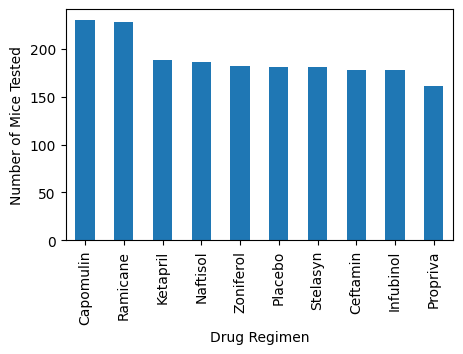

In [213]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Count how many mice are tested in eacch drug regimen
drug_and_mice = pd.DataFrame(drug_regimen_groupby['Mouse ID'].count())
drug_and_mice = drug_and_mice.sort_values('Mouse ID', ascending = False)

# Create a bar chart based off of the group series from before
drug_and_mice_chart=drug_and_mice.plot(kind="bar", figsize=(5,3), legend = None)

# Set the xlabel and ylabel using class methods
drug_and_mice_chart.set_ylabel("Number of Mice Tested")


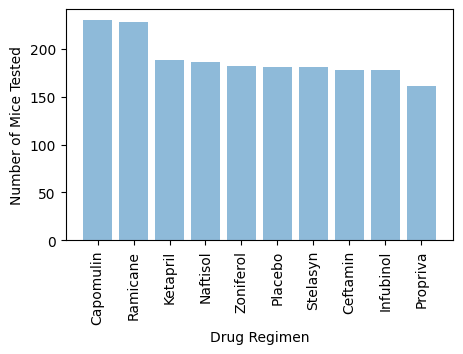

In [214]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_and_mice))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(5,3))
plt.bar(x_axis, drug_and_mice["Mouse ID"], alpha=0.5, align="center")
plt.xticks(tick_locations,drug_and_mice.index, rotation="vertical")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")

plt.show()

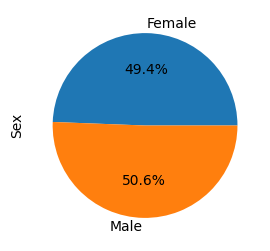

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_groupby = merged_metadata.groupby('Sex')
mice_gender_count = pd.DataFrame(mice_gender_groupby['Sex'].count())
mice_gender_pie = mice_gender_count.plot.pie(y = 'Sex', autopct="%1.1f%%", figsize = (4,3), legend = None)



([<matplotlib.patches.Wedge at 0x1ea58994e80>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

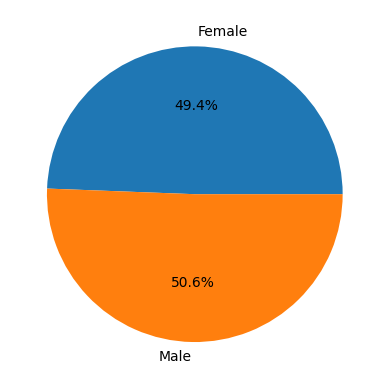

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(mice_gender_count.Sex, labels=mice_gender_count.index, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [217]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_groupby = merged_metadata[merged_metadata['Drug Regimen'].isin(["Capomulin", "Ramicane","Infubinol", "Ceftamin"])].groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(merged_metadata, mouse_id_groupby, how = "right", on=['Mouse ID','Timepoint'])
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [224]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['capomulin', 'ramicane', 'infubinol', 'ceftamin']
tumor_volume = [0, 0, 0, 0]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume[0] = []
tumor_volume[1] = []
tumor_volume[2] = []
tumor_volume[3] = []


for ind, series in new_df.iterrows():
    if series.loc['Drug Regimen'] == 'Capomulin':
        tumor_volume[0].append(series['Tumor Volume (mm3)'])
        tumor_volume[0].sort()
    elif series.loc['Drug Regimen'] == 'Ramicane':
        tumor_volume[1].append(series['Tumor Volume (mm3)'])
        tumor_volume[1].sort()
    elif series.loc['Drug Regimen'] == 'Infubinol':
        tumor_volume[2].append(series['Tumor Volume (mm3)'])
        tumor_volume[2].sort()
    elif series.loc['Drug Regimen'] == 'Ceftamin':
        tumor_volume[3].append(series['Tumor Volume (mm3)'])
        tumor_volume[3].sort()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = []
for treatment, tumor in zip(treatments,tumor_volume):
    q1,q3 = np.percentile(tumor,[25,75])
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    for i in tumor:
        if i > upper_bound or i < lower_bound:
            outliers.append(i)

    print(f'{treatment}\'s potential outliers: {outliers}')



capomulin's potential outliers: []
ramicane's potential outliers: []
infubinol's potential outliers: [36.3213458]
ceftamin's potential outliers: [36.3213458]


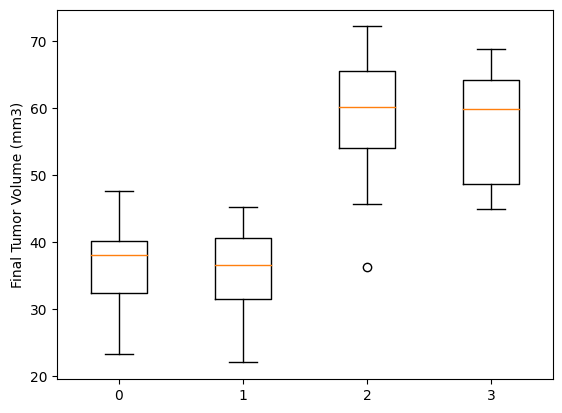

In [236]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
tick_locations = [treatment for treatment in treatments]
# plt.xticks(tick_locations,tumor_volume.index, rotation="vertical")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, positions=range(len(tumor_volume)))
plt.show()


## Line and Scatter Plots

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [221]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [222]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

